In [1]:
import pandas as pd

df = pd.read_csv('Employee Data.csv')


In [2]:
df.head()

,Employee ID,Employee Name,Active time (in minutes),Inactive time (in minutes),Minutes spent in offline meeting,Minutes spent in online meeting,Minutes spent in other offline activities,On-screen time spent ( in minutes ),Meeting schedules,Role,Productivity Score
0,1,John Doe,480,120,120,60,60,240,"Meeting 1: 9am-10am, Meeting 2: 10am-11am, Mee...",Sales Manager,80
1,2,Jane Smith,360,240,90,90,30,150,"Meeting 1: 9am-10am, Meeting 2: 11am-12pm, Mee...",Marketing Specialist,70
2,3,James Johnson,420,180,60,120,30,210,"Meeting 1: 2pm-3pm, Meeting 2: 4pm-5pm",HR Coordinator,60
3,4,Emily Davis,390,210,90,60,60,180,"Meeting 1: 11am-12pm, Meeting 2: 2pm-3pm, Meet...",Project Manager,75
4,5,Michael Wilson,450,150,60,90,60,240,"Meeting 1: 9am-10am, Meeting 2: 3pm-4pm, Meeti...",Software Developer,85


In [3]:
# convert all the categorical columns in the dataset to numerical values
#label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def label_encode(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = le.fit_transform(df[col])
    return df


In [4]:
df = label_encode(df)

In [5]:
df.head()

,Employee ID,Employee Name,Active time (in minutes),Inactive time (in minutes),Minutes spent in offline meeting,Minutes spent in online meeting,Minutes spent in other offline activities,On-screen time spent ( in minutes ),Meeting schedules,Role,Productivity Score
0,1,5,480,120,120,60,60,240,5,7,80
1,2,4,360,240,90,90,30,150,6,5,70
2,3,3,420,180,60,120,30,210,3,3,60
3,4,2,390,210,90,60,60,180,2,6,75
4,5,8,450,150,60,90,60,240,7,9,85


<Axes: >

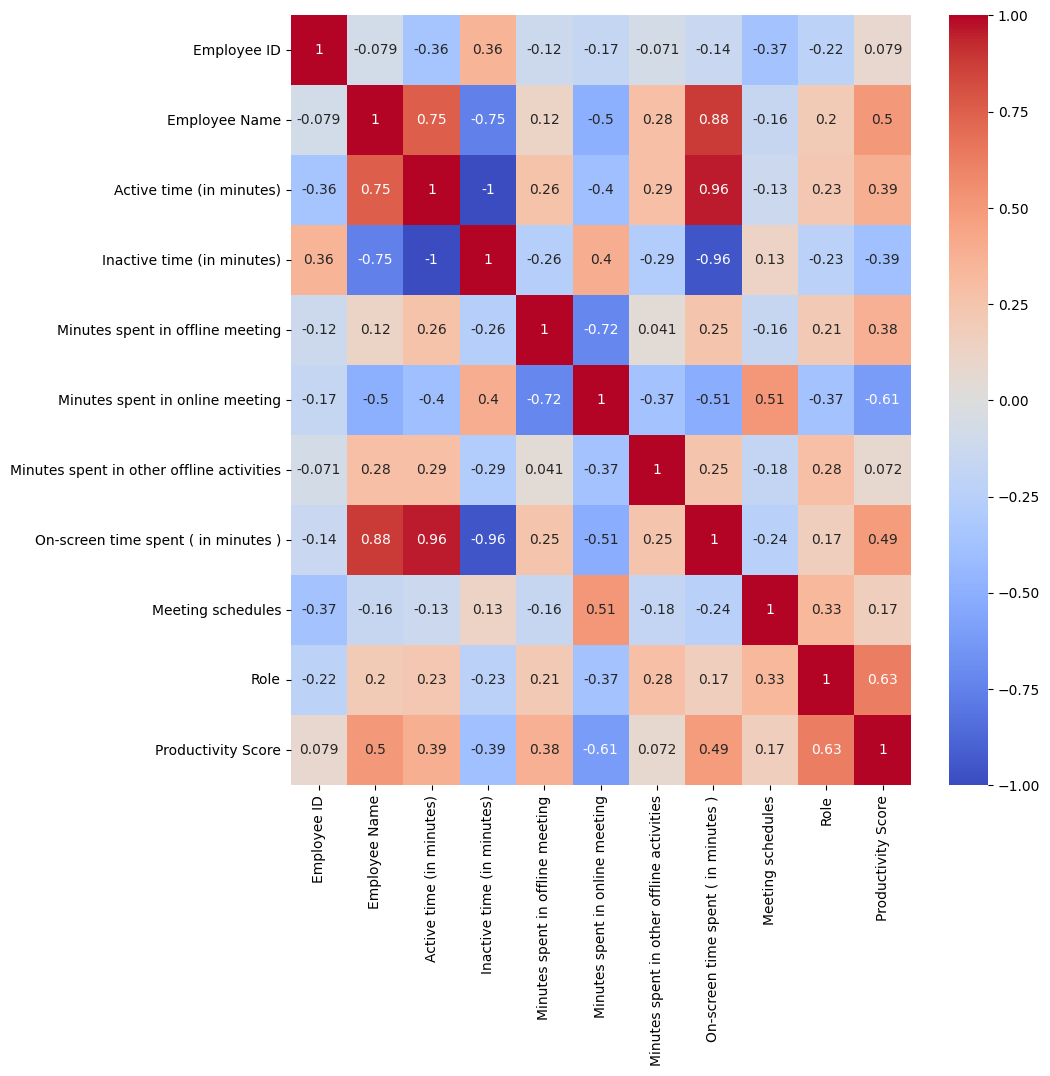

In [6]:
# use spearman correlation to find the correlation between the features
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# create a correlation matrix
corr = df.corr(method='spearman')
# plot the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [7]:
# do the train test split
from sklearn.model_selection import train_test_split
X = df.drop('Productivity Score', axis=1)
y = df['Productivity Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# create a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [9]:
# predict the values
y_pred = lr.predict(X_test)

In [10]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)

In [11]:
print(mae)

18.67022165267675


In [12]:
# calculate accuracy
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)

# calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred)

print(rmse)
print(r2)

417.38061796161276
-15.695224718464509
